# Tables 2 and 3 (Molina et al., submitted)

Table 2. Contingency table of daily ERA5 weather regime transitions (October–March, 1999-2019), which show frequencies from one regime (row) to another regime (column). Daily frequency of persistence is also shown (e.g., WR1 to WR1). Chi-squared statistical significance test rejects the null hypothesis that regimes are independent (0.05% level of a χ2 test). Probabilities are indicated within parentheses, computed using the column frequencies. 

Table 3. As in Table 2, but for daily CESM2 weather regime transitions (11-member ensemble mean; October–March, 1999-2019). Daily frequency of persistence is also shown (e.g., WR1 to WR1). Chi-squared statistical significance test rejects the null hypothesis that regimes are independent (0.05% level of a χ2 test).

# K-fold cross validation of clusters, and tables 2 and 3

## Imports

In [25]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

import som_analysis
import cluster_analysis
import narm_analysis

## functions

In [2]:
def get_cold_indx(ds, mo_init=9, mo_end=2):
    """
    Extract indices for cold season.
    Grabbing Sept thru February init, for Oct thru March predictions.
    """
    dt_array = pd.to_datetime(ds['time'])
    return xr.where((dt_array.month >= mo_init) | (dt_array.month <= mo_end),
                    True, False)

## open and preprocess data

In [ ]:
# region for clustering
lat0 = 10
lat1 = 70
lon0 = -150
lon1 = -40

# open era5 data and slice
ds_era5 = narm_analysis.era5_z500(
    lat0=lat0, lat1=lat1, lon0=lon0, lon1=lon1)

# era5 anomalies
ds_era5_anom = narm_analysis.era5_climo_wrs(
    ds_era5, rolling_days=5, variable='clim')

# restructure era5 array for machine learning training (SONDJFM)
ds_era5_anom = ds_era5_anom[
    get_cold_indx(ds_era5_anom, mo_init=10, mo_end=3), ...]
ds_era5_train = ds_era5_anom.stack(
    flat=('lat', 'lon')).transpose('time', 'flat').values

## pca and kmeans with era5

In [ ]:
# create pca object
pca_obj = PCA(12, whiten=True)

# fit pca with era5
pca_obj = pca_obj.fit(ds_era5_train)

# transform era5 data with pca
ds_era5_train = pca_obj.transform(ds_era5_train)

print(f'Variance explained: {pca_obj.explained_variance_ratio_ * 100}')
print(
f'Cumulative sum of variance explained for EOF1 and EOF2: {np.cumsum(pca_obj.explained_variance_ratio_) * 100}'
)

Variance explained: [25.95315607 17.65410568 11.94871708  9.0784389   7.98100848  6.14181738
  4.32605934  2.61658689  2.22642929  2.17049559  1.49813958  1.22541708]
Cumulative sum of variance explained for EOF1 and EOF2: [25.95315607 43.60726175 55.55597883 64.63441774 72.61542622 78.7572436
 83.08330294 85.69988983 87.92631912 90.09681471 91.59495429 92.82037136]


In [5]:
# train kmeans
k_means = KMeans(n_clusters=4,
                 init='k-means++',
                 n_init=10000,
                 max_iter=300,
                 tol=0.0001,
                 verbose=0,
                 random_state=0).fit(ds_era5_train)

print(f'inertia: {k_means.inertia_}')

inertia: 39379.20537231437


### k=5

In [6]:
indx0 = np.arange(0, ds_era5_train.shape[0], 1)[0:764]
indx1 = np.arange(0, ds_era5_train.shape[0], 1)[764:764*2]
indx2 = np.arange(0, ds_era5_train.shape[0], 1)[764*2:764*3]
indx3 = np.arange(0, ds_era5_train.shape[0], 1)[764*3:764*4]
indx4 = np.arange(0, ds_era5_train.shape[0], 1)[-764:]

In [7]:
# train kmeans
k_mean0 = KMeans(n_clusters=4,
                 init='k-means++',
                 n_init=10000,
                 max_iter=300,
                 tol=0.0001,
                 verbose=0,
                 random_state=0).fit(
    ds_era5_train[np.hstack([indx0, indx1, indx2, indx3]), :])

print(f'inertia: {k_mean0.inertia_}')

inertia: 31240.733397776807


In [8]:
# train kmeans
k_mean1 = KMeans(n_clusters=4,
                 init='k-means++',
                 n_init=10000,
                 max_iter=300,
                 tol=0.0001,
                 verbose=0,
                 random_state=0).fit(
    ds_era5_train[np.hstack([indx0, indx1, indx2, indx4]), :])

print(f'inertia: {k_mean1.inertia_}')

inertia: 31632.857417564504


In [9]:
# train kmeans
k_mean2 = KMeans(n_clusters=4,
                 init='k-means++',
                 n_init=10000,
                 max_iter=300,
                 tol=0.0001,
                 verbose=0,
                 random_state=0).fit(
    ds_era5_train[np.hstack([indx0, indx1, indx3, indx4]), :])

print(f'inertia: {k_mean2.inertia_}')

inertia: 30535.55941128951


In [10]:
# train kmeans
k_mean3 = KMeans(n_clusters=4,
                 init='k-means++',
                 n_init=10000,
                 max_iter=300,
                 tol=0.0001,
                 verbose=0,
                 random_state=0).fit(
    ds_era5_train[np.hstack([indx0, indx2, indx3, indx4]), :])

print(f'inertia: {k_mean3.inertia_}')

inertia: 31309.187258122216


In [11]:
# train kmeans
k_mean4 = KMeans(n_clusters=4,
                 init='k-means++',
                 n_init=10000,
                 max_iter=300,
                 tol=0.0001,
                 verbose=0,
                 random_state=0).fit(
    ds_era5_train[np.hstack([indx1, indx2, indx3, indx4]), :])

print(f'inertia: {k_mean4.inertia_}')

inertia: 31308.339644339747


### visualizing clusters generating with k-fold

In [12]:
# era5 data
z500_era5, z500_era5_dt = som_analysis.open_era5_files(
    variable='z500', return_time=True,
    lat0=lat0, lat1=lat1, lon0=lon0, lon1=lon1,
    leadday0=0, leadday1=42, rolldays=5,)

# restructure arrays
z500_standard_era5 = z500_era5.stack(
    new=('time', 'lead'), flat=('lat', 'lon')).transpose('new', 'flat')

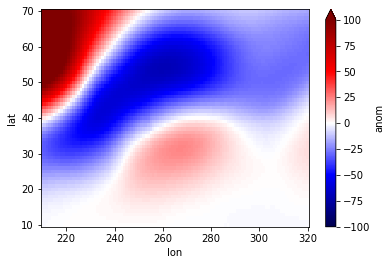

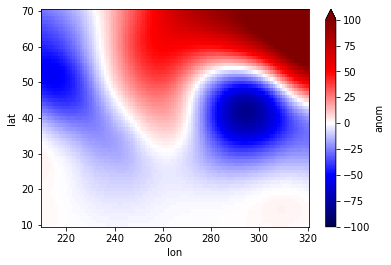

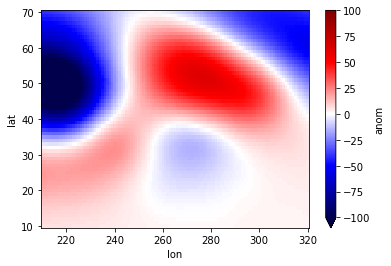

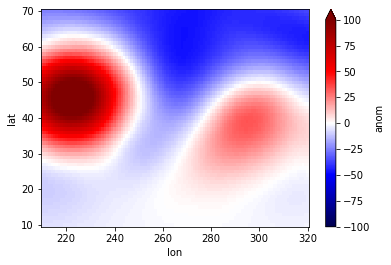

In [13]:
z500_era5_tmp_1, z500_era5_tmp_2, z500_era5_tmp_3, z500_era5_tmp_4 = cluster_analysis.composite_clusters_indx(
    z500_standard_era5, k_means, pca_obj, use_pca=True)

z500_era5_tmp_01 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_1, :, :]
z500_era5_tmp_02 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_2, :, :]
z500_era5_tmp_03 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_3, :, :]
z500_era5_tmp_04 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_4, :, :]

z500_era5_tmp_01.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_02.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_03.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_04.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()

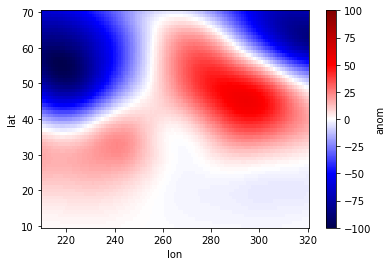

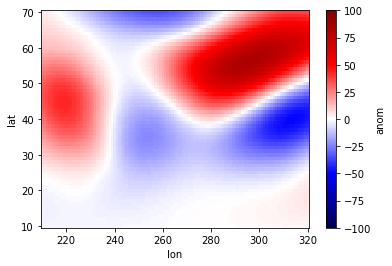

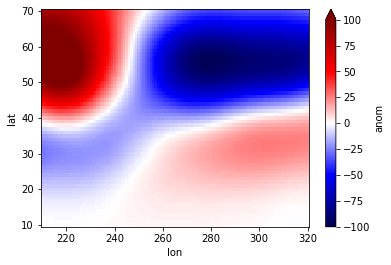

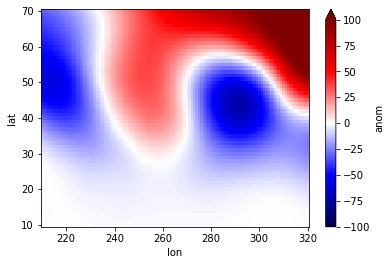

In [14]:
z500_era5_tmp_1, z500_era5_tmp_2, z500_era5_tmp_3, z500_era5_tmp_4 = cluster_analysis.composite_clusters_indx(
    z500_standard_era5, k_mean0, pca_obj, use_pca=True)

z500_era5_tmp_01 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_1, :, :]
z500_era5_tmp_02 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_2, :, :]
z500_era5_tmp_03 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_3, :, :]
z500_era5_tmp_04 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_4, :, :]

z500_era5_tmp_01.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_02.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_03.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_04.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()

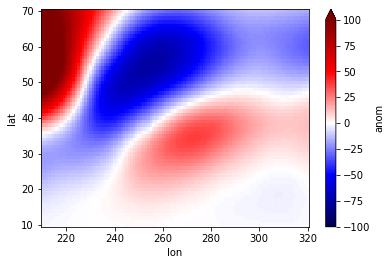

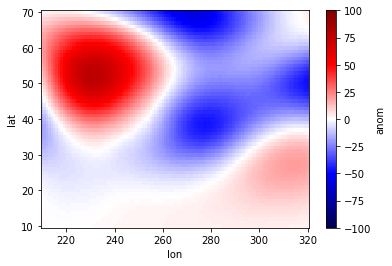

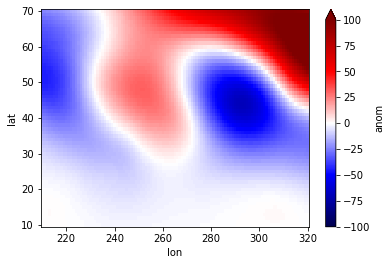

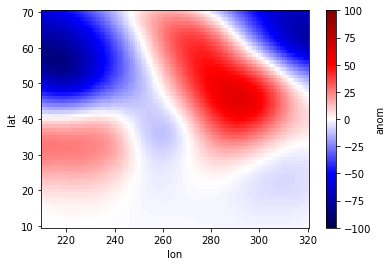

In [15]:
z500_era5_tmp_1, z500_era5_tmp_2, z500_era5_tmp_3, z500_era5_tmp_4 = cluster_analysis.composite_clusters_indx(
    z500_standard_era5, k_mean1, pca_obj, use_pca=True)

z500_era5_tmp_01 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_1, :, :]
z500_era5_tmp_02 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_2, :, :]
z500_era5_tmp_03 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_3, :, :]
z500_era5_tmp_04 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_4, :, :]

z500_era5_tmp_01.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_02.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_03.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_04.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()

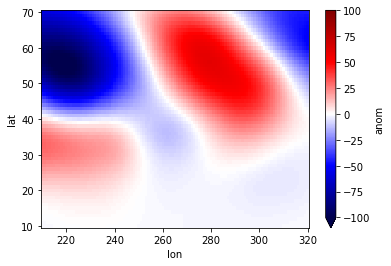

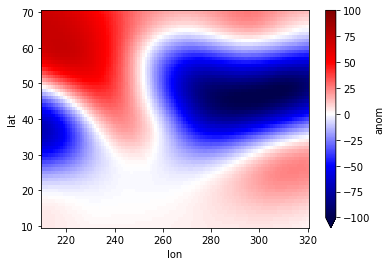

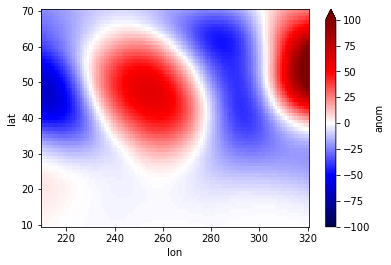

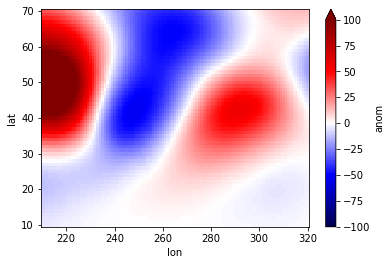

In [16]:
z500_era5_tmp_1, z500_era5_tmp_2, z500_era5_tmp_3, z500_era5_tmp_4 = cluster_analysis.composite_clusters_indx(
    z500_standard_era5, k_mean2, pca_obj, use_pca=True)

z500_era5_tmp_01 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_1, :, :]
z500_era5_tmp_02 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_2, :, :]
z500_era5_tmp_03 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_3, :, :]
z500_era5_tmp_04 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_4, :, :]

z500_era5_tmp_01.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_02.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_03.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_04.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()

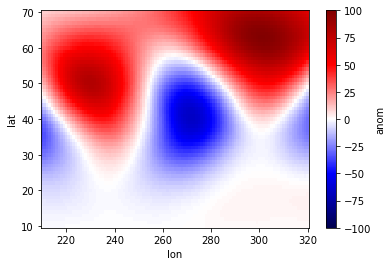

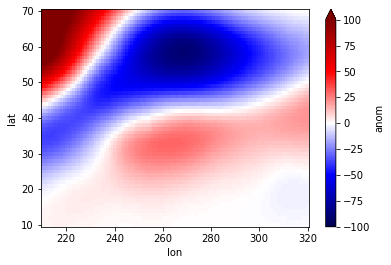

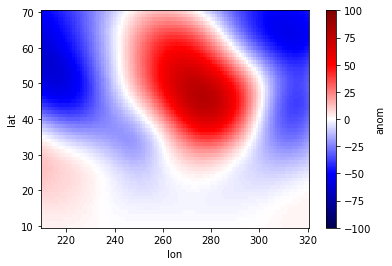

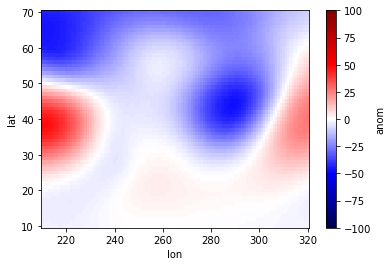

In [17]:
z500_era5_tmp_1, z500_era5_tmp_2, z500_era5_tmp_3, z500_era5_tmp_4 = cluster_analysis.composite_clusters_indx(
    z500_standard_era5, k_mean3, pca_obj, use_pca=True)

z500_era5_tmp_01 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_1, :, :]
z500_era5_tmp_02 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_2, :, :]
z500_era5_tmp_03 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_3, :, :]
z500_era5_tmp_04 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_4, :, :]

z500_era5_tmp_01.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_02.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_03.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_04.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()

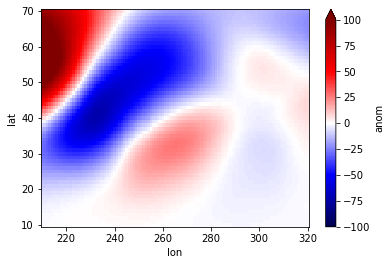

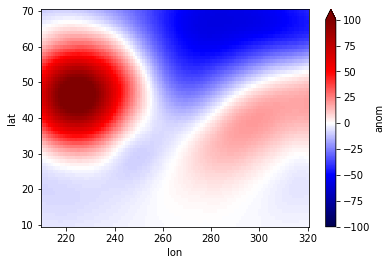

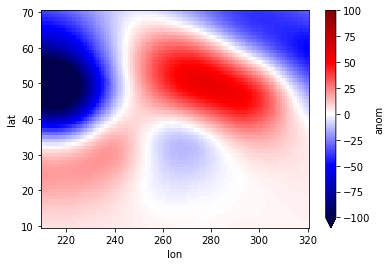

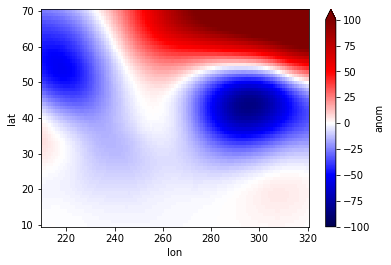

In [18]:
z500_era5_tmp_1, z500_era5_tmp_2, z500_era5_tmp_3, z500_era5_tmp_4 = cluster_analysis.composite_clusters_indx(
    z500_standard_era5, k_mean4, pca_obj, use_pca=True)

z500_era5_tmp_01 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_1, :, :]
z500_era5_tmp_02 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_2, :, :]
z500_era5_tmp_03 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_3, :, :]
z500_era5_tmp_04 = z500_standard_era5.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_4, :, :]

z500_era5_tmp_01.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_02.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_03.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()
z500_era5_tmp_04.mean('new',skipna=True).plot.pcolormesh('lon','lat',vmin=-100,vmax=100,cmap='seismic'); plt.show()

## load data with lead time bias corrected anomalies

In [19]:
# era5 data
z500_era5, z500_era5_dt = som_analysis.open_era5_files(
    variable='z500', return_time=True,
    lat0=lat0, lat1=lat1, lon0=lon0, lon1=lon1,
    leadday0=0, leadday1=42, rolldays=5,)

# cesm data
z500_cesm, z500_cesm_dt = som_analysis.open_cesm_files(
    variable='zg_500', return_time=True,
    lat0=lat0, lat1=lat1, lon0=lon0, lon1=lon1,
    leadday0=0, leadday1=42, rolldays=5,)

# cesm ensemble data
z500_ensm, z500_ensm_dt, z_ensm = som_analysis.open_cesm_ensembles(
    variable='zg_500', return_time=True,
    lat0=lat0, lat1=lat1, lon0=lon0, lon1=lon1,
    leadday0=0, leadday1=42, return_ens=True, rolldays=5)

# restructure arrays
z500_standard_era5 = z500_era5.stack(
    new=('time', 'lead'), flat=('lat', 'lon')).transpose('new', 'flat')
z500_standard_cesm = z500_cesm.stack(
    new=('time', 'lead'), flat=('lat', 'lon')).transpose('new', 'flat')
z500_standard_ensm = z500_ensm.stack(
    new=('time', 'ensemble', 'lead'),
    flat=('lat', 'lon')).transpose('new', 'flat')

## extract cluster labels

(projecting era5 pca and kmeans onto cesm2)

In [20]:
cluster_era5_evo = cluster_analysis.single_clusters(
    z500_standard_era5, k_means, pca_obj, use_pca=True)
cluster_cesm_evo = cluster_analysis.single_clusters(
    z500_standard_cesm, k_means, pca_obj, use_pca=True)
cluster_ensm_evo = cluster_analysis.ensemble_clusters(
    z500_standard_ensm, k_means, pca_obj, use_pca=True)

# Table 2

In [21]:
thearray = cluster_era5_evo

wr11 = []; wr12 = []; wr13 = []; wr14 = []; wr21 = []; wr22 = []; wr23 = []; wr24 = []
wr31 = []; wr32 = []; wr33 = []; wr34 = []; wr41 = []; wr42 = []; wr43 = []; wr44 = []

for i in range(544):
    
    for j in range(43):
        
        if j == 0:
            wr_ = thearray[0,i,j]
            
        if j > 0:
            
            if wr_ == 0.0:
                
                if thearray[0,i,j] == 0.0:
                    wr11.append(1)
                if thearray[0,i,j] == 1.0:
                    wr12.append(1)
                if thearray[0,i,j] == 2.0:
                    wr13.append(1)
                if thearray[0,i,j] == 3.0:
                    wr14.append(1)
                    
            if wr_ == 1.0:
                
                if thearray[0,i,j] == 0.0:
                    wr21.append(1)
                if thearray[0,i,j] == 1.0:
                    wr22.append(1)
                if thearray[0,i,j] == 2.0:
                    wr23.append(1)
                if thearray[0,i,j] == 3.0:
                    wr24.append(1)
                    
            if wr_ == 2.0:
                
                if thearray[0,i,j] == 0.0:
                    wr31.append(1)
                if thearray[0,i,j] == 1.0:
                    wr32.append(1)
                if thearray[0,i,j] == 2.0:
                    wr33.append(1)
                if thearray[0,i,j] == 3.0:
                    wr34.append(1)
                    
            if wr_ == 3.0:
                
                if thearray[0,i,j] == 0.0:
                    wr41.append(1)
                if thearray[0,i,j] == 1.0:
                    wr42.append(1)
                if thearray[0,i,j] == 2.0:
                    wr43.append(1)
                if thearray[0,i,j] == 3.0:
                    wr44.append(1)
                    
            wr_ = thearray[0,i,j]
            
fct = np.array(
    [[len(wr11),len(wr21),len(wr31),len(wr41),len(wr11)+len(wr21)+len(wr31)+len(wr41)],
     [len(wr12),len(wr22),len(wr32),len(wr42),len(wr12)+len(wr22)+len(wr32)+len(wr42)],
     [len(wr13),len(wr23),len(wr33),len(wr43),len(wr13)+len(wr23)+len(wr33)+len(wr43)],
     [len(wr14),len(wr24),len(wr34),len(wr44),len(wr14)+len(wr24)+len(wr34)+len(wr44)],
     [len(wr11)+len(wr12)+len(wr13)+len(wr14),
      len(wr21)+len(wr22)+len(wr23)+len(wr24),
      len(wr31)+len(wr32)+len(wr33)+len(wr34),
      len(wr41)+len(wr42)+len(wr43)+len(wr44),
      len(wr11)+len(wr12)+len(wr13)+len(wr14)+len(wr21)+len(wr22)+len(wr23)+len(wr24)+\
      len(wr31)+len(wr32)+len(wr33)+len(wr34)+len(wr41)+len(wr42)+len(wr43)+len(wr44)]])

chi2,pval,dof,exp = stats.chi2_contingency(fct)
print(fct)
#print(exp)
print(chi2,pval)

[[ 3769   193   162   297  4421]
 [  177  4364   323   348  5212]
 [  193   366  5458   249  6266]
 [  274   298   316  6061  6949]
 [ 4413  5221  6259  6955 22848]]
45125.57644312666 0.0


# Table 3

In [23]:
thearray = cluster_cesm_evo

wr11 = []; wr12 = []; wr13 = []; wr14 = []; wr21 = []; wr22 = []; wr23 = []; wr24 = []
wr31 = []; wr32 = []; wr33 = []; wr34 = []; wr41 = []; wr42 = []; wr43 = []; wr44 = []

for i in range(544):
    
    for j in range(43):
        
        if j == 0:
            wr_ = thearray[0,i,j]
            
        if j > 0:
            
            if wr_ == 0.0:
                
                if thearray[0,i,j] == 0.0:
                    wr11.append(1)
                if thearray[0,i,j] == 1.0:
                    wr12.append(1)
                if thearray[0,i,j] == 2.0:
                    wr13.append(1)
                if thearray[0,i,j] == 3.0:
                    wr14.append(1)
                    
            if wr_ == 1.0:
                
                if thearray[0,i,j] == 0.0:
                    wr21.append(1)
                if thearray[0,i,j] == 1.0:
                    wr22.append(1)
                if thearray[0,i,j] == 2.0:
                    wr23.append(1)
                if thearray[0,i,j] == 3.0:
                    wr24.append(1)
                    
            if wr_ == 2.0:
                
                if thearray[0,i,j] == 0.0:
                    wr31.append(1)
                if thearray[0,i,j] == 1.0:
                    wr32.append(1)
                if thearray[0,i,j] == 2.0:
                    wr33.append(1)
                if thearray[0,i,j] == 3.0:
                    wr34.append(1)
                    
            if wr_ == 3.0:
                
                if thearray[0,i,j] == 0.0:
                    wr41.append(1)
                if thearray[0,i,j] == 1.0:
                    wr42.append(1)
                if thearray[0,i,j] == 2.0:
                    wr43.append(1)
                if thearray[0,i,j] == 3.0:
                    wr44.append(1)
                    
            wr_ = thearray[0,i,j]
            
fct = np.array(
    [[len(wr11),len(wr21),len(wr31),len(wr41),len(wr11)+len(wr21)+len(wr31)+len(wr41)],
     [len(wr12),len(wr22),len(wr32),len(wr42),len(wr12)+len(wr22)+len(wr32)+len(wr42)],
     [len(wr13),len(wr23),len(wr33),len(wr43),len(wr13)+len(wr23)+len(wr33)+len(wr43)],
     [len(wr14),len(wr24),len(wr34),len(wr44),len(wr14)+len(wr24)+len(wr34)+len(wr44)],
     [len(wr11)+len(wr12)+len(wr13)+len(wr14),
      len(wr21)+len(wr22)+len(wr23)+len(wr24),
      len(wr31)+len(wr32)+len(wr33)+len(wr34),
      len(wr41)+len(wr42)+len(wr43)+len(wr44),
      len(wr11)+len(wr12)+len(wr13)+len(wr14)+len(wr21)+len(wr22)+len(wr23)+len(wr24)+\
      len(wr31)+len(wr32)+len(wr33)+len(wr34)+len(wr41)+len(wr42)+len(wr43)+len(wr44)]])

chi2,pval,dof,exp = stats.chi2_contingency(fct)
print(fct)
#print(exp)
print(chi2,pval)

[[ 3060   115   139   276  3590]
 [  104  3715   261   299  4379]
 [  190   268  5704   404  6566]
 [  259   327   438  7289  8313]
 [ 3613  4425  6542  8268 22848]]
45467.67663433874 0.0


### elbow method plot (for reference)

1
2
3
4
5
6
7
8
9


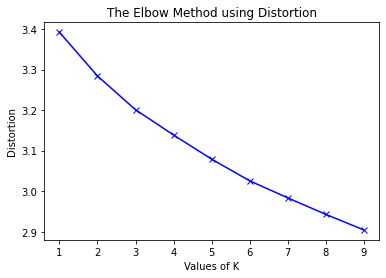

In [26]:
distortions = []
inertias = []
K = range(1, 10)
X = ds_era5_train

for k in K:

    print(k)

    # Building and fitting the model
    kmeanModel = KMeans(
        n_clusters=k,
        init='k-means++',
        n_init=10000,
        max_iter=300,
        tol=0.0001,
        verbose=0,
        random_state=0).fit(X)

    # kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

## weather regime agreement as a function of lead time

In [27]:
print("ERA5 WR1 frequency:", cluster_era5_evo[cluster_era5_evo==0].shape[0])
print("ERA5 WR2 frequency:", cluster_era5_evo[cluster_era5_evo==1].shape[0])
print("ERA5 WR3 frequency:", cluster_era5_evo[cluster_era5_evo==2].shape[0])
print("ERA5 WR4 frequency:", cluster_era5_evo[cluster_era5_evo==3].shape[0])
print("")
print("CESM2 WR1 frequency (ens mean):", cluster_cesm_evo[cluster_cesm_evo==0].shape[0])
print("CESM2 WR2 frequency (ens mean):", cluster_cesm_evo[cluster_cesm_evo==1].shape[0])
print("CESM2 WR3 frequency (ens mean):", cluster_cesm_evo[cluster_cesm_evo==2].shape[0])
print("CESM2 WR4 frequency (ens mean):", cluster_cesm_evo[cluster_cesm_evo==3].shape[0])
print("")
print("CESM2 WR1 frequency (indv ens):", cluster_ensm_evo[cluster_ensm_evo==0].shape[0])
print("CESM2 WR2 frequency (indv ens):", cluster_ensm_evo[cluster_ensm_evo==1].shape[0])
print("CESM2 WR3 frequency (indv ens):", cluster_ensm_evo[cluster_ensm_evo==2].shape[0])
print("CESM2 WR4 frequency (indv ens):", cluster_ensm_evo[cluster_ensm_evo==3].shape[0])

ERA5 WR1 frequency: 4524
ERA5 WR2 frequency: 5339
ERA5 WR3 frequency: 6408
ERA5 WR4 frequency: 7121

CESM2 WR1 frequency (ens mean): 3690
CESM2 WR2 frequency (ens mean): 4512
CESM2 WR3 frequency (ens mean): 6709
CESM2 WR4 frequency (ens mean): 8481

CESM2 WR1 frequency (indv ens): 53001
CESM2 WR2 frequency (indv ens): 57910
CESM2 WR3 frequency (indv ens): 69640
CESM2 WR4 frequency (indv ens): 76761


## composites of the weather types/regimes

In [28]:
# cluster the data

cluster_era5_01, cluster_era5_02, cluster_era5_03, cluster_era5_04 = cluster_analysis.composite_clusters(
    z500_standard_era5, k_means, pca_obj, use_pca=True)

cluster_cesm_01, cluster_cesm_02, cluster_cesm_03, cluster_cesm_04 = cluster_analysis.composite_clusters(
    z500_standard_cesm, k_means, pca_obj, use_pca=True)

## weather regime similarities

In [29]:
print(
    stats.pearsonr(cluster_era5_01.mean('new',skipna=True).values.flatten(),
                   cluster_era5_02.mean('new',skipna=True).values.flatten())[0])

print(
    stats.pearsonr(cluster_era5_01.mean('new',skipna=True).values.flatten(),
                   cluster_era5_03.mean('new',skipna=True).values.flatten())[0])

print(
    stats.pearsonr(cluster_era5_01.mean('new',skipna=True).values.flatten(),
                   cluster_era5_04.mean('new',skipna=True).values.flatten())[0])

print(
    stats.pearsonr(cluster_era5_02.mean('new',skipna=True).values.flatten(),
                   cluster_era5_03.mean('new',skipna=True).values.flatten())[0])

print(
    stats.pearsonr(cluster_era5_02.mean('new',skipna=True).values.flatten(),
                   cluster_era5_04.mean('new',skipna=True).values.flatten())[0])

print(
    stats.pearsonr(cluster_era5_03.mean('new',skipna=True).values.flatten(),
                   cluster_era5_04.mean('new',skipna=True).values.flatten())[0])

-0.3766447998573811
-0.5931004999055469
0.2120332977004566
0.001096920448808159
-0.680488619493687
-0.5267873364990872


In [30]:
print(
    stats.pearsonr(cluster_cesm_01.mean('new',skipna=True).values.flatten(),
                   cluster_cesm_02.mean('new',skipna=True).values.flatten())[0])

print(
    stats.pearsonr(cluster_cesm_01.mean('new',skipna=True).values.flatten(),
                   cluster_cesm_03.mean('new',skipna=True).values.flatten())[0])

print(
    stats.pearsonr(cluster_cesm_01.mean('new',skipna=True).values.flatten(),
                   cluster_cesm_04.mean('new',skipna=True).values.flatten())[0])

print(
    stats.pearsonr(cluster_cesm_02.mean('new',skipna=True).values.flatten(),
                   cluster_cesm_03.mean('new',skipna=True).values.flatten())[0])

print(
    stats.pearsonr(cluster_cesm_02.mean('new',skipna=True).values.flatten(),
                   cluster_cesm_04.mean('new',skipna=True).values.flatten())[0])

print(
    stats.pearsonr(cluster_cesm_03.mean('new',skipna=True).values.flatten(),
                   cluster_cesm_04.mean('new',skipna=True).values.flatten())[0])

-0.44678411692678993
-0.5827193144694967
0.3703679912538275
0.000705497963714943
-0.7080287639512566
-0.5454904719272486


## similarities in weather regimes for cesm vs era5

In [31]:
# grab cluster indices

z500_era5_tmp_1, z500_era5_tmp_2, z500_era5_tmp_3, z500_era5_tmp_4 = cluster_analysis.composite_clusters_indx(
    z500_standard_era5, k_means, pca_obj, use_pca=True)

z500_cesm_tmp_1, z500_cesm_tmp_2, z500_cesm_tmp_3, z500_cesm_tmp_4 = cluster_analysis.composite_clusters_indx(
    z500_standard_cesm, k_means, pca_obj, use_pca=True)

In [32]:
# era5 data
z500_era5_tmp, _ = som_analysis.open_era5_files(
    variable='z500', return_time=True,
    lat0=10, lat1=90, lon0=-360, lon1=0,
    leadday0=0, leadday1=42, rolldays=5)

# cesm data
z500_cesm_tmp, _ = som_analysis.open_cesm_files(
    variable='zg_500', return_time=True,
    lat0=10, lat1=90, lon0=-360, lon1=0,
    leadday0=0, leadday1=42, rolldays=5)

# restructure data array
z500_standard_era5_tmp = z500_era5_tmp.stack(
    new=('time', 'lead'), flat=('lat', 'lon')).transpose('new', 'flat')

z500_standard_cesm_tmp = z500_cesm_tmp.stack(
    new=('time', 'lead'), flat=('lat', 'lon')).transpose('new', 'flat')

In [33]:
# extract clusters using indices

z500_era5_tmp_01 = z500_standard_era5_tmp.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_1, :, :]
z500_era5_tmp_02 = z500_standard_era5_tmp.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_2, :, :]
z500_era5_tmp_03 = z500_standard_era5_tmp.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_3, :, :]
z500_era5_tmp_04 = z500_standard_era5_tmp.unstack('flat').transpose('new','lat','lon')[z500_era5_tmp_4, :, :]

z500_cesm_tmp_01 = z500_standard_cesm_tmp.unstack('flat').transpose('new','lat','lon')[z500_cesm_tmp_1, :, :]
z500_cesm_tmp_02 = z500_standard_cesm_tmp.unstack('flat').transpose('new','lat','lon')[z500_cesm_tmp_2, :, :]
z500_cesm_tmp_03 = z500_standard_cesm_tmp.unstack('flat').transpose('new','lat','lon')[z500_cesm_tmp_3, :, :]
z500_cesm_tmp_04 = z500_standard_cesm_tmp.unstack('flat').transpose('new','lat','lon')[z500_cesm_tmp_4, :, :]

In [34]:
# weather regime acc between cesm and era5

print(
    stats.pearsonr(z500_era5_tmp_01.mean('new',skipna=True).values.flatten(),
                   z500_cesm_tmp_01.mean('new',skipna=True).values.flatten()))

print(
    stats.pearsonr(z500_era5_tmp_02.mean('new',skipna=True).values.flatten(),
                   z500_cesm_tmp_02.mean('new',skipna=True).values.flatten()))

print(
    stats.pearsonr(z500_era5_tmp_03.mean('new',skipna=True).values.flatten(),
                   z500_cesm_tmp_03.mean('new',skipna=True).values.flatten()))

print(
    stats.pearsonr(z500_era5_tmp_04.mean('new',skipna=True).values.flatten(),
                   z500_cesm_tmp_04.mean('new',skipna=True).values.flatten()))

(0.9347975055640052, 0.0)
(0.9609541594552963, 0.0)
(0.9730686817789251, 0.0)
(0.973627389959713, 0.0)


## other stuff: hovmoller diagrams

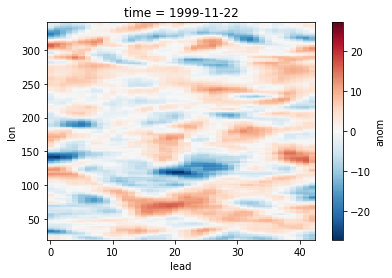

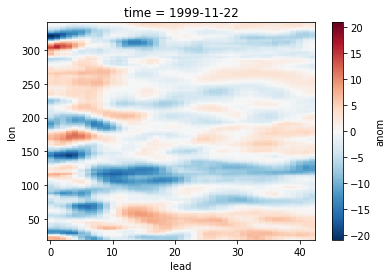

In [136]:
weights = np.cos(np.deg2rad(rlut_era5_tmp.unstack('flat').lat.values))

avg_data = (
    -rlut_era5_tmp.unstack('flat').transpose('new','lat','lon').unstack(
    'new').isel(time=19).transpose(
    'lat','lon','lead') * weights[:, None, None]).sum(dim='lat',
                                                      skipna=True) / np.sum(weights)

avg_data.plot()
plt.show()

avg_data = (
    rlut_cesm_tmp.unstack('flat').transpose('new','lat','lon').unstack(
    'new').isel(time=19).transpose(
    'lat','lon','lead') * weights[:, None, None]).sum(dim='lat',
                                                      skipna=True) / np.sum(weights)

avg_data.plot()
plt.show()

In [167]:
avg_data.lon.values[::20] - 20

array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.,
       220., 240., 260., 280., 300., 320.])

Text(0, 0.5, 'lead (days)')

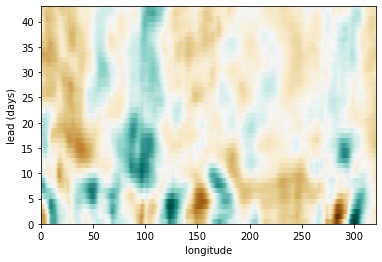

In [169]:
plt.pcolormesh(avg_data.values.T, cmap='BrBG_r')
plt.xlabel('longitude')
plt.xticks(avg_data.lon.values[::50] - 20)
#plt.xticklabels(avg_data.lon.values[::50])
plt.ylabel('lead (days)')